# Classification on Kidney Disease

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('kidney_disease.csv')  

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.shape

(400, 26)

In [6]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
df1=df.drop('id',axis=1)

In [9]:
df1.groupby('classification').count()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
classification,,,,,,,,,,,,,,,,,,,,,
ckd,240,238,207,208,205,106,193,248,248,210,...,203,183,150,126,248,248,248,248,248,248
ckd\t,2,2,1,1,1,1,1,2,2,2,...,1,1,2,1,2,2,2,2,2,2
notckd,149,148,145,145,145,141,141,146,146,144,...,144,146,143,143,148,148,148,149,149,149


In [10]:
#converting value 'ckd\t' to 'ckd' as it seems to be typing mistake
df1['classification'].replace('ckd\t','ckd',inplace=True)

In [11]:
df1.groupby('classification').mean()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
classification,,,,,,,,,,,
ckd,54.541322,79.625000,1.013918,1.722488,0.76699,175.419811,72.389030,4.414916,133.901786,4.878443,10.647549
notckd,46.516779,71.351351,1.022414,0.000000,0.00000,107.722222,32.798611,0.868966,141.731034,4.337931,15.188194


In [12]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [14]:
#converting classification column to binary data
df1['ckd']=pd.get_dummies(df1['classification'])['ckd']
df1.drop('classification',axis=1,inplace=True)

In [15]:
df1['rc'].replace('\t?',5,inplace=True)

In [16]:
rc=np.array(df1['rc'],dtype='float64')
df1['rc']=rc

In [17]:
df1['pcv'].replace(['\t43','\t?'],np.nan,inplace=True)
pcv=np.array(df1['pcv'],dtype='float64')
df1['pcv']=pcv
a=np.round(df1.groupby('ckd')['pcv'].mean()[1])
b=np.round(df1.groupby('ckd')['pcv'].mean()[0])

df1['pcv']=np.where(df1.ckd.eq(1) & df1['pcv'].isnull(), a, df1['pcv'])
df1['pcv']=np.where(df1.ckd.eq(0) & df1['pcv'].isnull(), b, df1['pcv'])

In [18]:
df1['wc'].replace(['\t?','\t8400','\t6200'],np.nan,inplace=True)
wc=np.array(df1['wc'],dtype='float64')
df1['wc']=wc
a=np.round(df1.groupby('ckd')['wc'].mean()[1])
b=np.round(df1.groupby('ckd')['wc'].mean()[0])

df1['wc']=np.where(df1.ckd.eq(1) & df1['wc'].isnull(), a, df1['wc'])
df1['wc']=np.where(df1.ckd.eq(0) & df1['wc'].isnull(), b, df1['wc'])
      

In [19]:
#replacing the null values 
clist=['age', 'bp', 'sg', 'al', 'su','bgr', 'bu','sc', 'sod', 'pot', 'hemo','rc']
for i in clist:
    
    a=np.round(df1.groupby('ckd')[i].mean()[1],decimals=2)
    b=np.round(df1.groupby('ckd')[i].mean()[0],decimals=2)

    df1[i]=np.where(df1.ckd.eq(1) & df1[i].isnull(), a, df1[i])
    df1[i]=np.where(df1.ckd.eq(0) & df1[i].isnull(), b, df1[i])

In [20]:
df1.rbc.fillna('normal',inplace=True)
df1.pc.fillna('normal',inplace=True)

In [21]:
df1.dm.value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [22]:
df1.dm.replace(['\tno','\tyes',' yes'],['no','yes','yes'],inplace=True)

In [23]:
df1.cad.value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [24]:
df1.cad.replace('\tno','no',inplace=True)

In [25]:
df1.shape

(400, 25)

In [26]:
df1.dropna(inplace=True)
df1.shape

(393, 25)

In [27]:
df1.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
ckd      0
dtype: int64

In [28]:
dfdummies=pd.get_dummies(df1,columns=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'])
dfdummies

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,133.9,4.88,...,0,1,1,0,1,0,1,0,1,0
1,7.0,50.0,1.020,4.0,0.0,175.42,18.0,0.8,133.9,4.88,...,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,133.9,4.88,...,0,1,1,0,0,1,1,0,0,1
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.0,2.50,...,1,0,1,0,0,1,0,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,133.9,4.88,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.00,49.0,0.5,150.0,4.90,...,1,0,1,0,1,0,1,0,1,0
396,42.0,70.0,1.025,0.0,0.0,75.00,31.0,1.2,141.0,3.50,...,1,0,1,0,1,0,1,0,1,0
397,12.0,80.0,1.020,0.0,0.0,100.00,26.0,0.6,137.0,4.40,...,1,0,1,0,1,0,1,0,1,0
398,17.0,60.0,1.025,0.0,0.0,114.00,50.0,1.0,135.0,4.90,...,1,0,1,0,1,0,1,0,1,0


In [29]:
dfdummies.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'ckd', 'rbc_abnormal', 'rbc_normal', 'pc_abnormal',
       'pc_normal', 'pcc_notpresent', 'pcc_present', 'ba_notpresent',
       'ba_present', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes', 'cad_no',
       'cad_yes', 'appet_good', 'appet_poor', 'pe_no', 'pe_yes', 'ane_no',
       'ane_yes'],
      dtype='object')

In [30]:
dfdummies.drop(['rbc_abnormal', 'pc_abnormal','pcc_notpresent','ba_notpresent','htn_no','dm_no',
                'cad_no','appet_poor', 'pe_no','ane_no'],axis=1,inplace=True)

In [31]:
l=list(dfdummies.columns)
l.remove('ckd')


In [32]:
x=dfdummies[l]
y=dfdummies['ckd']

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=11)

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1500)

In [35]:
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=1500)

In [36]:
ypred=lr.predict(xtest)
ypred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

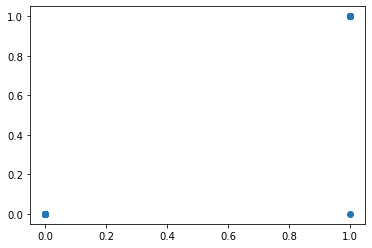

In [37]:
plt.scatter(ytest,ypred)

In [38]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [39]:
metrics.confusion_matrix(ytest,ypred)

array([[50,  0],
       [ 1, 67]], dtype=int64)

In [40]:
metrics.accuracy_score(ytest,ypred)

0.9915254237288136

In [41]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.99      0.99        68

    accuracy                           0.99       118
   macro avg       0.99      0.99      0.99       118
weighted avg       0.99      0.99      0.99       118



## We have high accuracy for this model, hence it is good fit for data

# SVM

In [42]:
from sklearn.svm import SVC,SVR
svc_model=SVC(probability=True)

In [43]:
y=dfdummies['ckd'].replace([1,0],['ckd','notckd'])

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=11)

In [45]:
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)

In [46]:
svc_model.fit(xtrain,ytrain)

SVC(probability=True)

In [47]:
ypred=svc_model.predict(xtest)

In [48]:
confusion_matrix(ytest,ypred)

array([[68,  0],
       [50,  0]], dtype=int64)

In [49]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         ckd       0.58      1.00      0.73        68
      notckd       0.00      0.00      0.00        50

    accuracy                           0.58       118
   macro avg       0.29      0.50      0.37       118
weighted avg       0.33      0.58      0.42       118



C:\Users\Sujata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sujata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sujata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
svc_model.support_

array([  1,   5,  25,  94,  97, 111, 113, 124, 177, 178, 188, 199, 206,
       239, 272,  26,  37,  63,  66,  81, 108, 110, 125, 134, 142, 144,
       159, 163, 170, 172, 214, 269])

In [51]:
svc_model.support_vectors_

array([[ 0.79231101,  0.21742511, -0.24325639, -0.87379651, -0.47249354,
        -0.49237802, -0.54579813,  1.95212574,  0.3520829 , -0.24417689,
         0.73082518,  0.56731491, -0.74201123,  0.87594802,  0.35643959,
         0.48860898, -0.33669025, -0.23160278, -0.80418069, -0.7440916 ,
        -0.32995601,  0.5       , -0.49431153, -0.46563307],
       [ 0.55932197,  0.21742511,  0.61437831, -0.87379651, -0.47249354,
        -0.29410923, -0.74157894, -0.5022321 ,  0.50384039, -0.20644869,
        -0.31315268, -0.30565168,  0.16249654, -0.53836448,  0.35643959,
         0.48860898, -0.33669025, -0.23160278, -0.80418069, -0.7440916 ,
        -0.32995601,  0.5       , -0.49431153, -0.46563307],
       [-1.47933215, -0.51764293, -0.24325639, -0.87379651,  3.27637327,
         1.18051494, -0.80683921, -0.43341832, -0.42188031,  0.08783124,
         1.29009903,  1.81441004, -0.70256475,  1.78110802,  0.35643959,
         0.48860898, -0.33669025, -0.23160278, -0.80418069,  1.34392055,
  

In [52]:
svc_model.n_support_

array([15, 17])

In [53]:
from sklearn.model_selection import GridSearchCV

## computing the best parameters

In [54]:
param_grid={'C':[0.1,1,5,9,10,100],'gamma':['scale','auto'],'kernel':['linear','poly','rbf','sigmoid']}
param_grid

{'C': [0.1, 1, 5, 9, 10, 100],
 'gamma': ['scale', 'auto'],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [55]:
#grid=GridSearchCV(svc_model,param_grid)
#grid.fit(xtrain,ytrain)

In [56]:
#grid.best_estimator_ ,grid.best_estimator_.gamma ,grid.best_estimator_.kernel

## fitting model based on best fit parameters (SVC(C=5, kernel='linear'), 'scale', 'linear')

In [57]:
from sklearn import pipeline
from sklearn.pipeline import make_pipeline
clf=make_pipeline(StandardScaler(),SVC(C=5,gamma='scale',kernel='linear',probability=True))
clf.fit(xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, kernel='linear', probability=True))])

In [58]:
ypred=clf.predict(xtest)

In [59]:
confusion_matrix(ytest,ypred)

array([[68,  0],
       [50,  0]], dtype=int64)

In [60]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         ckd       0.58      1.00      0.73        68
      notckd       0.00      0.00      0.00        50

    accuracy                           0.58       118
   macro avg       0.29      0.50      0.37       118
weighted avg       0.33      0.58      0.42       118



C:\Users\Sujata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sujata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sujata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## We see that our model has classified 0 and 1 in 'crd' with 98% and 100% accuracy

# Decision Tree

In [61]:
from sklearn import tree
dt= tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [62]:
dt

DecisionTreeClassifier(criterion='entropy')

In [63]:
from sklearn.tree import export_graphviz
import graphviz

In [64]:
dot_data=export_graphviz(dt,out_file=None,feature_names=l,
                        class_names=['ckd','notckd'],filled=True,rounded=True,special_characters=False)
graph=graphviz.Source(dot_data)

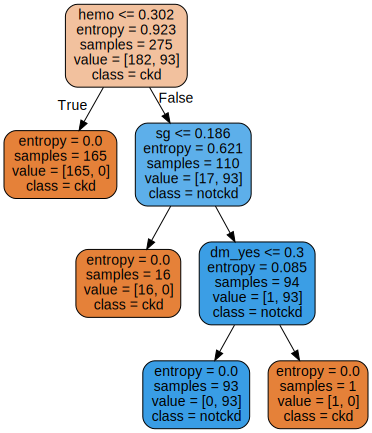

In [65]:
graph

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=5)

In [68]:
ytest.shape

(118,)

In [69]:
rf=RandomForestClassifier(random_state=42)

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(estimator=rf, cv = 10,param_grid=param_dist,n_jobs = 1)

cv_rf.fit(xtrain,ytrain)

print('Best Parameters using grid search: \n',cv_rf.best_params_)

In [70]:
rf.set_params(bootstrap=True,criterion= 'gini', max_depth= 3, max_features= 'auto',oob_score=True)

RandomForestClassifier(max_depth=3, oob_score=True, random_state=42)

In [71]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, oob_score=True, random_state=42)

In [72]:
ypred=rf.predict(xtest)

In [73]:
confusion_matrix(ytest,ypred)

array([[71,  0],
       [ 0, 47]], dtype=int64)

In [74]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        71
      notckd       1.00      1.00      1.00        47

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [75]:
rf.oob_score_

1.0

# Naive Bayes

C:\Users\Sujata\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sujata\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


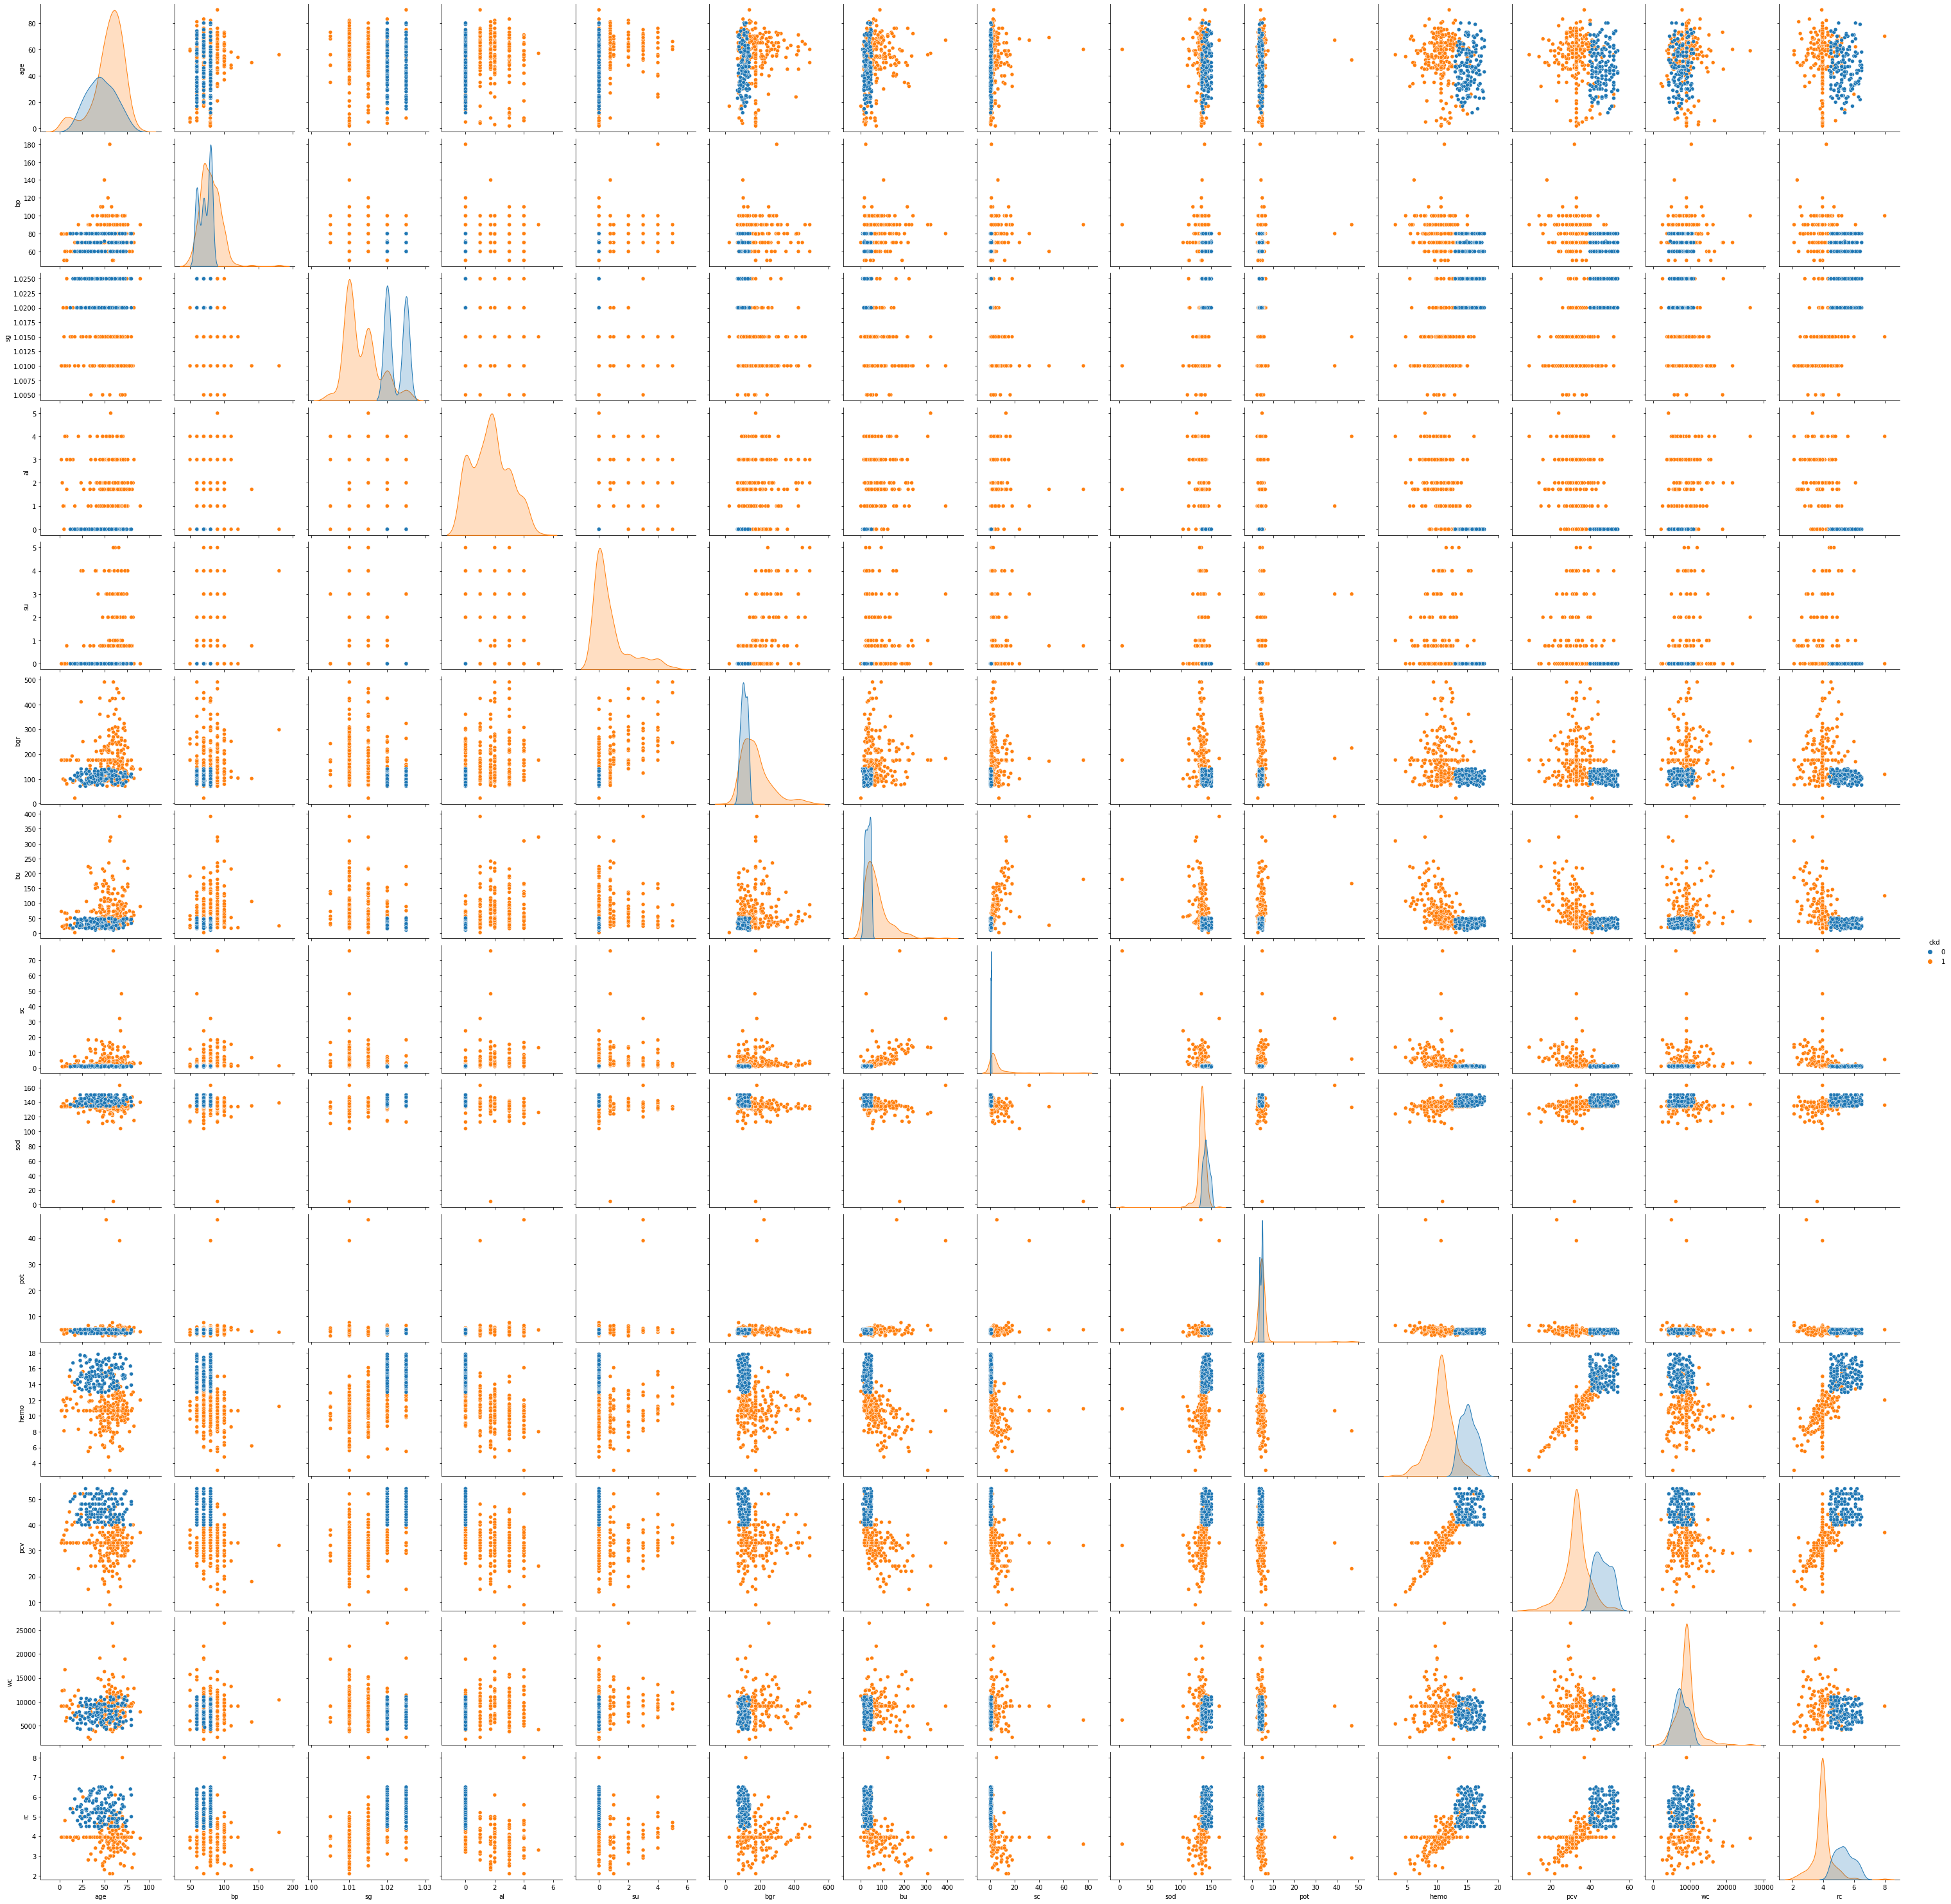

In [76]:
sns.pairplot(data=df1,hue='ckd',height=3)

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [78]:
gnb=GaussianNB()
mnb=MultinomialNB()

In [79]:
fit_gnb=gnb.fit(xtrain,ytrain)

In [80]:
y_pred_gnb=fit_gnb.predict(xtest)

In [81]:
confusion_matrix(ytest,y_pred_gnb)

array([[67,  4],
       [ 0, 47]], dtype=int64)

In [82]:
print(classification_report(ytest,y_pred_gnb))

              precision    recall  f1-score   support

         ckd       1.00      0.94      0.97        71
      notckd       0.92      1.00      0.96        47

    accuracy                           0.97       118
   macro avg       0.96      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



In [83]:
print('Accuracy of Guassian Naive Bayes model is',metrics.accuracy_score(ytest,y_pred_gnb)*100)

Accuracy of Guassian Naive Bayes model is 96.61016949152543


In [84]:
fit_mnb=mnb.fit(xtrain,ytrain)

In [85]:
ypred_mnb=fit_mnb.predict(xtest)

In [86]:
confusion_matrix(ytest,ypred_mnb)

array([[55, 16],
       [ 0, 47]], dtype=int64)

In [87]:
print(classification_report(ytest,ypred_mnb))

              precision    recall  f1-score   support

         ckd       1.00      0.77      0.87        71
      notckd       0.75      1.00      0.85        47

    accuracy                           0.86       118
   macro avg       0.87      0.89      0.86       118
weighted avg       0.90      0.86      0.87       118



In [88]:
print("Model accuracy is :",metrics.accuracy_score(ytest,ypred_mnb))

Model accuracy is : 0.864406779661017


### Gaussian Naive bayes model is better than Multinomial model 

# AUC-ROC curve

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

In [90]:
r_probs = [0 for _ in range(len(ytest))]
dt_probs = dt.predict_proba(xtest)
rf_probs = rf.predict_proba(xtest)
nb_probs = gnb.predict_proba(xtest)
svm_probs= clf.predict_proba(xtest)
lr_probs=lr.predict_proba(xtest)

In [91]:
len(r_probs)

118

In [92]:
dt_probs.shape,rf_probs.shape,nb_probs.shape,svm_probs.shape,lr_probs.shape

((118, 2), (118, 2), (118, 2), (118, 2), (118, 2))

In [93]:
dt_probs=dt_probs[:,1]
rf_probs = rf_probs[:,1]
nb_probs = nb_probs[:,1]
svm_probs= svm_probs[:,1]
lr_probs= lr_probs[:,1]

In [94]:
r_auc = roc_auc_score(ytest, r_probs)
dt_auc = roc_auc_score(ytest, dt_probs)
rf_auc = roc_auc_score(ytest, rf_probs)
nb_auc = roc_auc_score(ytest, nb_probs)
svm_auc= roc_auc_score(ytest,svm_probs)
lr_auc =roc_auc_score(ytest,lr_probs)

In [95]:
dt_probs.shape,rf_probs.shape,nb_probs.shape,svm_probs.shape,lr_probs.shape

((118,), (118,), (118,), (118,), (118,))

In [96]:
ytest=ytest.replace({'ckd':1,'notckd':0})
ytest.size

118

In [97]:
r_fpr, r_tpr, r_thresh = roc_curve(ytest, r_probs)
dt_fpr, dt_tpr, dt_thresh = roc_curve(ytest, dt_probs)
rf_fpr, rf_tpr, rf_thresh = roc_curve(ytest, rf_probs)
nb_fpr, nb_tpr, nb_thresh = roc_curve(ytest, nb_probs)
svm_fpr,svm_tpr,svm_thresh = roc_curve(ytest,svm_probs)
lr_fpr, lr_tpr, lr_thresh = roc_curve(ytest, lr_probs)

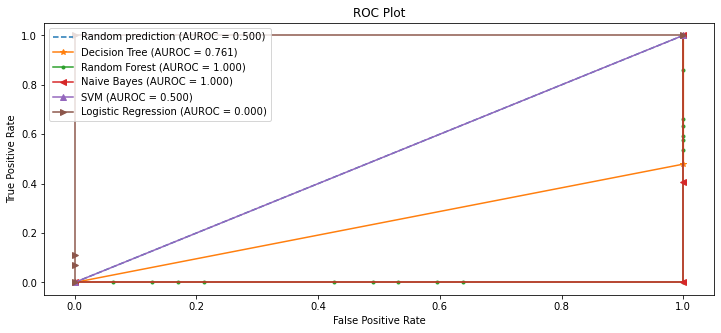

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='*', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='<', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(svm_fpr, svm_tpr, marker='^', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(lr_fpr, lr_tpr, marker='>', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()